In [1]:
import seaborn as sns; sns.set_style("dark")
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler, Normalizer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_categorical_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import janitor
import numpy as np

In [2]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds.shape

(53940, 10)

In [4]:
train, test = train_test_split(diamonds, random_state = 10, train_size = 0.85, shuffle=True)

### Data Visualization

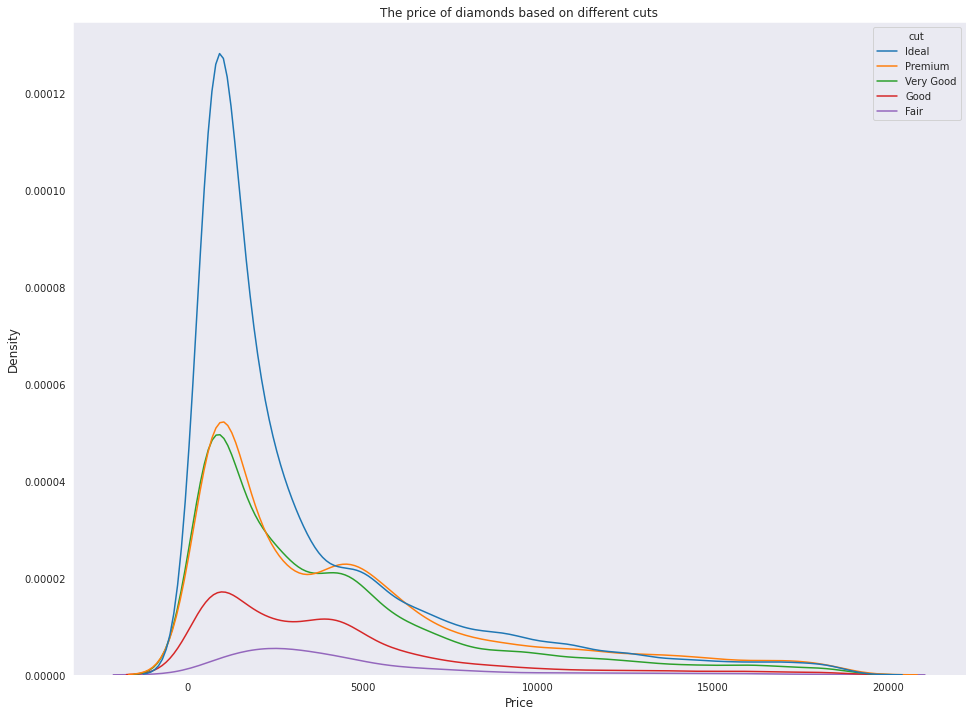

In [5]:
plt.figure(figsize = (16,12))
sns.kdeplot(x = "price", data = train,hue = "cut")
plt.xlabel("Price", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.title("The price of diamonds based on different cuts")
plt.show();

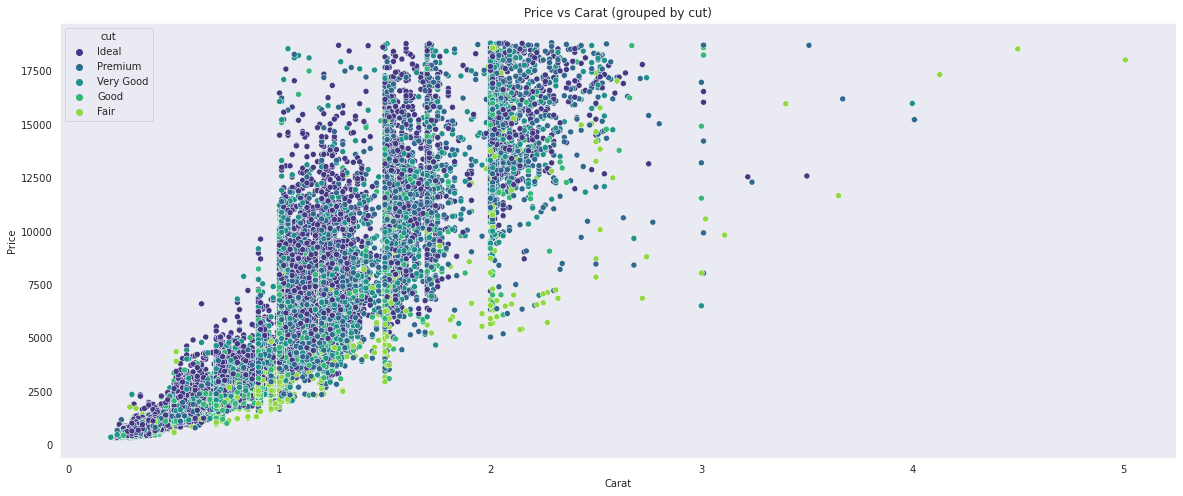

In [6]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = "carat", y = "price", data = train, hue = "cut", palette = "viridis")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Price vs Carat (grouped by cut)")
plt.show();

<AxesSubplot:>

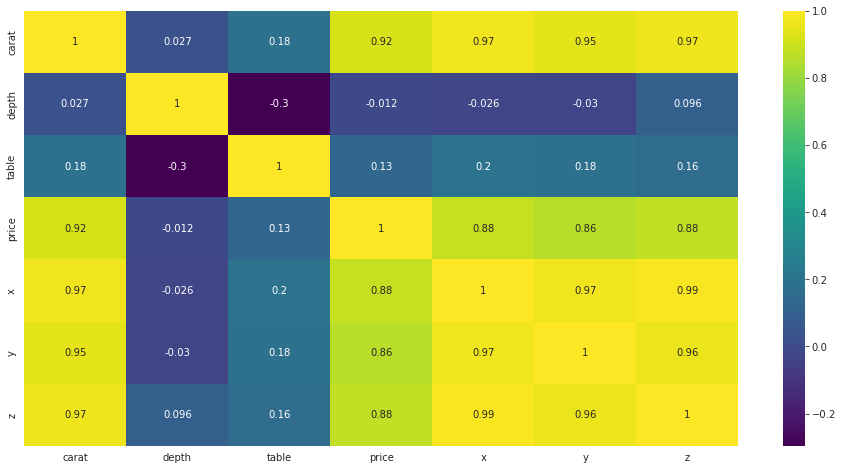

In [7]:
plt.figure(figsize = (16,8))
cor = train.corr()
sns.heatmap(cor, annot = True, cmap = "viridis")

### Train & Test Split

In [8]:
x_train, y_train = train.drop("price", axis = 1), train["price"]
x_test, y_test = test.drop("price", axis = 1), test["price"]

### Gathering Categorical and numerical columns

In [9]:
num = []
cat = []
columns = list(x_train.columns)
for col in columns:
    if is_numeric_dtype(x_train[col]):
        num.append(col)
    elif is_categorical_dtype(x_train[col]):
        cat.append(col)

In [10]:
num

['carat', 'depth', 'table', 'x', 'y', 'z']

In [11]:
cat

['cut', 'color', 'clarity']

In [12]:
train["cut"].unique()

['Very Good', 'Ideal', 'Premium', 'Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [13]:
train["color"].unique()

['H', 'F', 'G', 'D', 'J', 'E', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [14]:
train["clarity"].unique()

['VS2', 'SI1', 'SI2', 'VVS1', 'VS1', 'VVS2', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [15]:
ord2 = OrdinalEncoder(categories = [["Fair", "Good", "Very Good", "Premium", "Ideal"],
                                    ['D', 'E', 'F', 'G', 'H', 'I', 'J'],
                                    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
min_max = MinMaxScaler()

In [16]:
ct = ColumnTransformer([("ord", ord2, cat), ("min_max", min_max, num)])

### Pipeline Development - Linear Regression

In [17]:
lr = LinearRegression()
n = 1

In [18]:
pipeline = Pipeline([("ct", ct), ("poly", PolynomialFeatures(n)), ("lr", lr)])

In [19]:
cross_val_score(pipeline, x_train, y_train, cv = 5)

array([0.88915785, 0.9067295 , 0.90594292, 0.90567003, 0.90930921])

In [20]:
model = pipeline.fit(x_train, y_train)

### Root Mean Squared Error/R-Squared Score

#### Training results

In [21]:
pred_train = model.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train, pred_train))
r2 = r2_score(y_train, pred_train)
mae = mean_absolute_error(y_train, pred_train)
print("R Squared Score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

R Squared Score:  0.9069592581525782
RMSE:  1215.4490524405314
MAE:  804.8067667961344


#### Testing results

In [22]:
pred_test = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_test))
r2 = r2_score(y_test, pred_test)
mae = mean_absolute_error(y_test, pred_test)
print("R Squared Score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

R Squared Score:  0.9071544484951192
RMSE:  1223.5864487848878
MAE:  812.3010455932152


#### Testing error distribution

In [23]:
test_error = y_test - pred_test

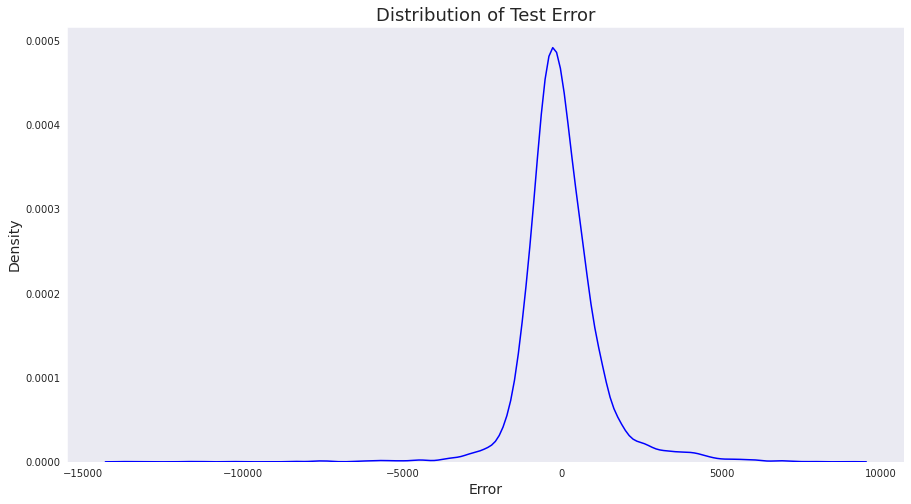

In [24]:
plt.figure(figsize=(15,8))
sns.kdeplot(test_error, color = "blue")
plt.xlabel("Error", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
plt.title("Distribution of Test Error",fontsize = 18)
plt.show();

### Pipeline Development - Polynomial Regression

In [25]:
lr = LinearRegression()
n = 2

In [26]:
pipeline = Pipeline([("ct", ct), ("poly", PolynomialFeatures(n)), ("lr", lr)])

In [27]:
cross_val_score(pipeline, x_train, y_train, cv = 5)

array([-3.17609119,  0.94179316,  0.96294724,  0.94700124,  0.96328414])

In [28]:
model = pipeline.fit(x_train, y_train)

### Root Mean Squared Error/R-Squared Score

#### Training results

In [29]:
pred_train = model.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train, pred_train))
r2 = r2_score(y_train, pred_train)
mae = mean_absolute_error(y_train, pred_train)
print("R Squared Score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

R Squared Score:  0.9634156091911621
RMSE:  762.1634024283168
MAE:  459.77432573881663


#### Testing results

In [30]:
pred_test = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_test))
r2 = r2_score(y_test, pred_test)
mae = mean_absolute_error(y_test, pred_test)
print("R Squared Score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

R Squared Score:  0.40518499852259493
RMSE:  3097.0275230920233
MAE:  503.0397064546897


#### Testing error distribution

In [31]:
test_error = y_test - pred_test

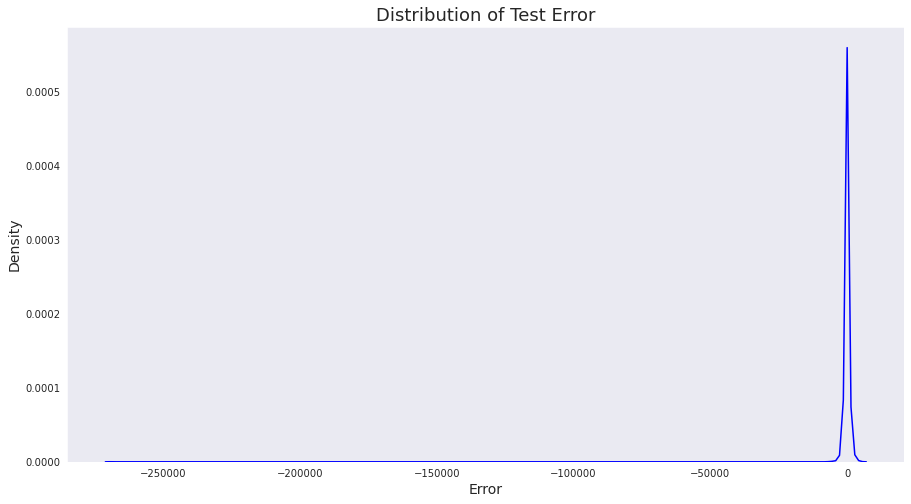

In [32]:
plt.figure(figsize=(15,8))
sns.kdeplot(test_error, color = "blue")
plt.xlabel("Error", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
plt.title("Distribution of Test Error",fontsize = 18)
plt.show();

### Selecting the optimal number of degrees

In [33]:
n = list(np.arange(1,6))
r2_train = []
r2_test = []

In [34]:
for i in n:
    pipeline = Pipeline([("ct", ct), ("poly", PolynomialFeatures(i)), ("lr", lr)])
    model = pipeline.fit(x_train, y_train)
    pred_train = pipeline.predict(x_train)
    r2_train.append(r2_score(y_train, pred_train))
    pred_test = pipeline.predict(x_test)
    r2_test.append(r2_score(y_test, pred_test))
    print(i)

1
2
3
4
5


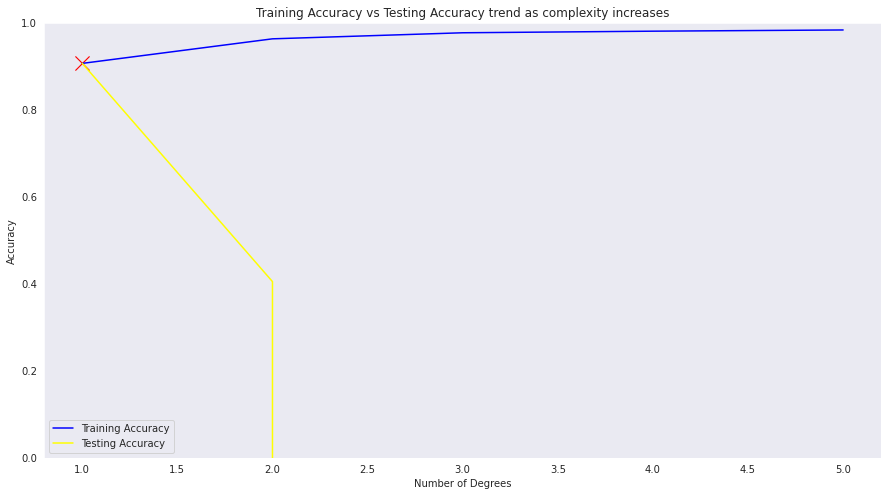

In [36]:
plt.figure(figsize=(15,8))
sns.lineplot(x = n, y = r2_train, label = "Training Accuracy", color = "blue")
sns.lineplot(x = n, y = r2_test, label = "Testing Accuracy", color = "yellow")
sns.scatterplot(y = r2_test[0], x = [1], color = "red", marker = "x", s = 200)
plt.xlabel("Number of Degrees")
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Testing Accuracy trend as complexity increases")
plt.show()

1 seems to be the best option as it is clearly not overfitting